## EDA

In [1]:

import pandas as pd
crimes_data = pd.read_csv('crimes_data.csv')

In [2]:
crimes_data

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,Longitude,Latitude,Severity
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,3
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,3
...,...,...,...,...,...,...,...,...,...,...
669737,2003-01-06 00:15:00,ROBBERY,ROBBERY ON THE STREET WITH A GUN,Monday,TARAVAL,NONE,FARALLONES ST / CAPITOL AV,-122.459033,37.714056,4
669738,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,INGLESIDE,NONE,600 Block of EDNA ST,-122.447364,37.731948,3
669739,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,SOUTHERN,NONE,5TH ST / FOLSOM ST,-122.403390,37.780266,3
669740,2003-01-06 00:01:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Monday,SOUTHERN,NONE,TOWNSEND ST / 2ND ST,-122.390531,37.780607,2


In [31]:
crimes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669742 entries, 0 to 669741
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Dates       669742 non-null  object 
 1   Category    669742 non-null  object 
 2   Descript    669742 non-null  object 
 3   DayOfWeek   669742 non-null  object 
 4   PdDistrict  669742 non-null  object 
 5   Resolution  669742 non-null  object 
 6   Address     669742 non-null  object 
 7   Longitude   669742 non-null  float64
 8   Latitude    669742 non-null  float64
dtypes: float64(2), object(7)
memory usage: 46.0+ MB


- I checked for null values and found non
- i found duplicated values and removed them.
- I reversed the features Longitude	and Latitude . I found they are reversed when implementing the map
- finally saved the dataset as crimes_data.csv and imported it at the start

In [ ]:

null_values = crimes_data.isnull().sum()

crimes_data = crimes_data.drop_duplicates()

# 3. Correct the order of Longitude and Latitude if needed
# Assuming the need to swap them based on the context provided
if 'Longitude' in crimes_data.columns and 'Latitude' in crimes_data.columns:
    crimes_data = crimes_data.rename(columns={'Longitude': 'Latitude', 'Latitude': 'Longitude'})

# Save the cleaned data
crimes_data.to_csv('crimes_data.csv', index=False)

In [30]:
#after preprocessing the data.
print(crimes_data.isnull().sum())
print(crimes_data.duplicated().sum())

Dates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
Longitude     0
Latitude      0
dtype: int64
0


In [1]:

import matplotlib.pyplot as plt
import seaborn as sns

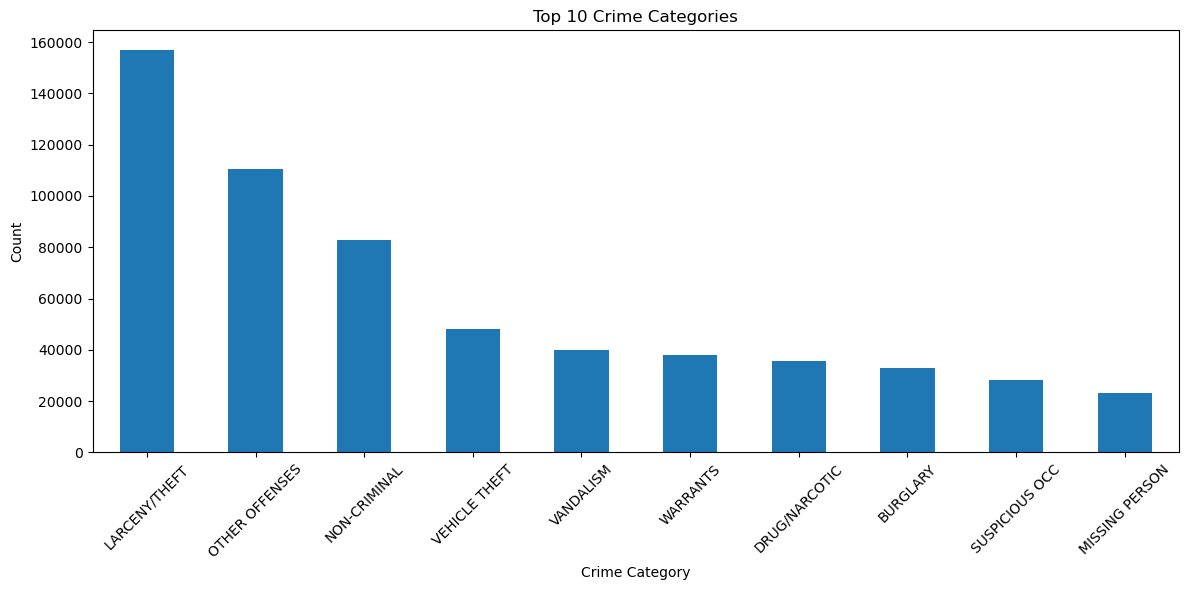

In [21]:
crime_counts = crimes_data['Category'].value_counts()
plt.figure(figsize=(12, 6))
crime_counts[:10].plot(kind='bar')
plt.title('Top 10 Crime Categories')
plt.ylabel('Count')
plt.xlabel('Crime Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

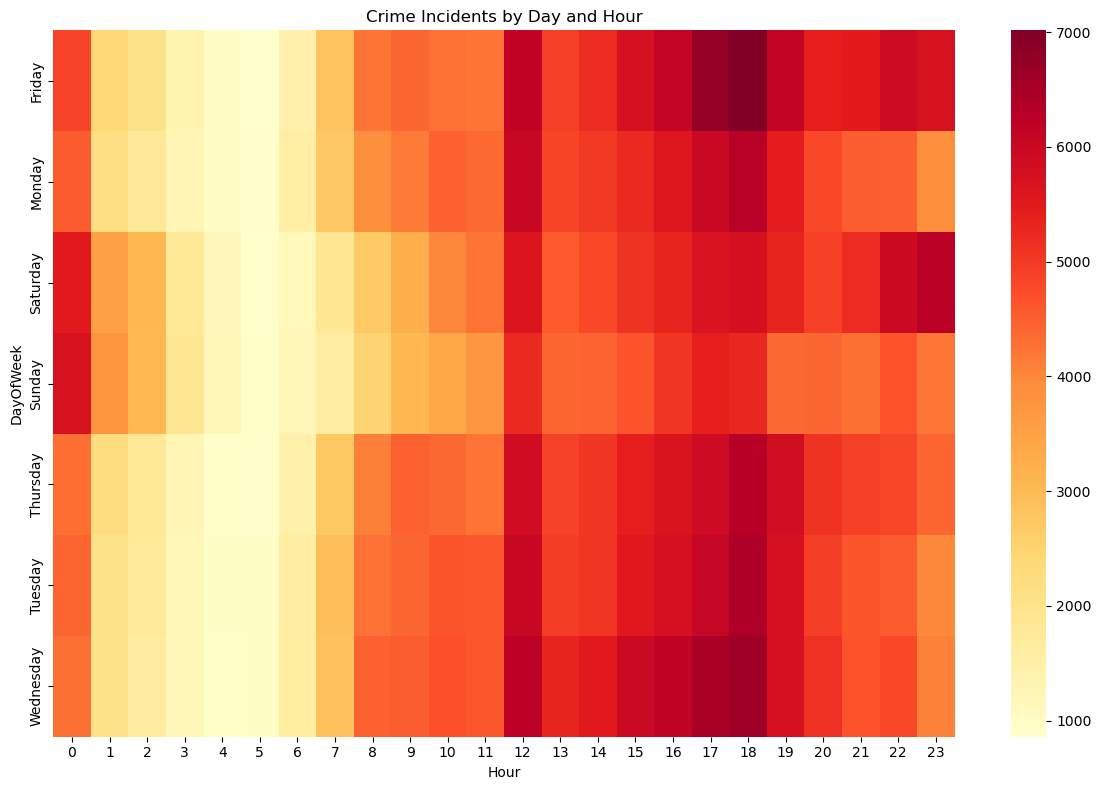

In [8]:
day_hour = pd.crosstab(crimes_data['DayOfWeek'], crimes_data['Hour'])
plt.figure(figsize=(12, 8))
sns.heatmap(day_hour, cmap="YlOrRd")
plt.title('Crime Incidents by Day and Hour')
plt.tight_layout()
plt.show()

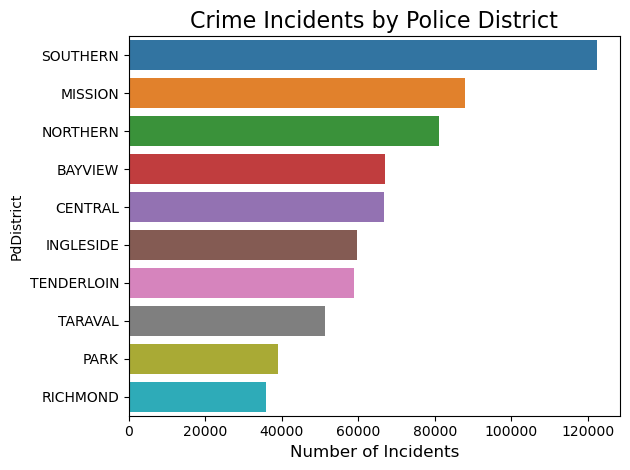

In [22]:
district_counts = crimes_data['PdDistrict'].value_counts()
sns.barplot(x=district_counts.values, y=district_counts.index)
plt.title('Crime Incidents by Police District', fontsize=16)
plt.xlabel('Number of Incidents', fontsize=12)
plt.tight_layout()

d:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


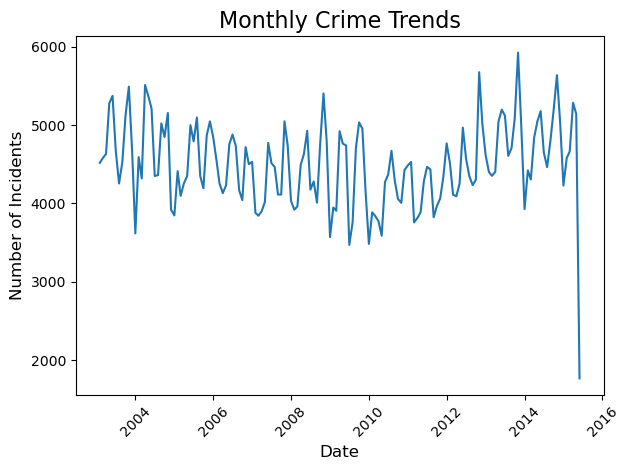

In [23]:
monthly_crimes = crimes_data.groupby(pd.Grouper(key='Dates', freq='M')).size()
sns.lineplot(x=monthly_crimes.index, y=monthly_crimes.values)
plt.title('Monthly Crime Trends', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

In [5]:
crimes_data['Descript'].unique()

array(['WARRANT ARREST', 'TRAFFIC VIOLATION ARREST',
       'GRAND THEFT FROM LOCKED AUTO', 'GRAND THEFT FROM UNLOCKED AUTO',
       'STOLEN AUTOMOBILE', 'PETTY THEFT FROM LOCKED AUTO',
       'MISCELLANEOUS INVESTIGATION',
       'MALICIOUS MISCHIEF, VANDALISM OF VEHICLES', 'FOUND PROPERTY',
       'ROBBERY, ARMED WITH A KNIFE', 'TRAFFIC VIOLATION',
       'ROBBERY, BODILY FORCE',
       'STAY AWAY OR COURT ORDER, NON-DV RELATED',
       'ATTEMPTED THEFT FROM LOCKED VEHICLE', 'CIVIL SIDEWALKS, CITATION',
       'MALICIOUS MISCHIEF, VANDALISM', 'SUSPICIOUS PACKAGE',
       'AIDED CASE, MENTAL DISTURBED', 'PETTY THEFT SHOPLIFTING',
       'PROBATION VIOLATION', 'DRIVERS LICENSE, SUSPENDED OR REVOKED',
       'STOLEN MOTORCYCLE', 'GRAND THEFT FROM PERSON',
       'BURGLARY, VEHICLE (ARREST MADE)',
       'ATTEMPTED ROBBERY ON THE STREET WITH BODILY FORCE',
       'PETTY THEFT FROM A BUILDING', 'STOLEN AND RECOVERED VEHICLE',
       'INVESTIGATIVE DETENTION', 'ENROUTE TO OUTSIDE JURISDICT

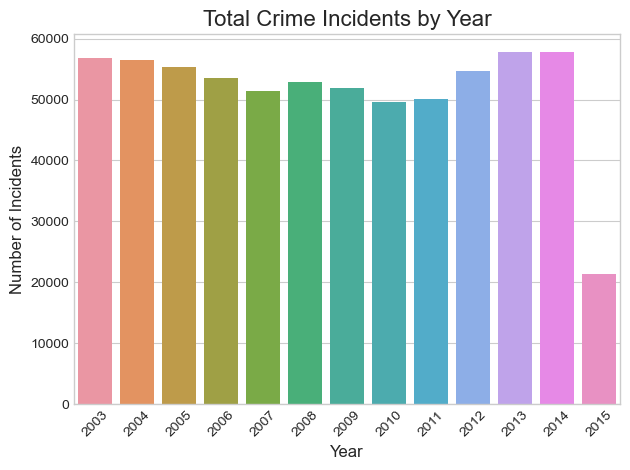

In [26]:

# 1. Total Crime by Year
yearly_crime = crimes_data['Year'].value_counts().sort_index()
sns.barplot(x=yearly_crime.index, y=yearly_crime.values)
plt.title('Total Crime Incidents by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

### Key Insights So Far:
- The dataset contains 669,742 unique crime records.
- Crimes are categorized into different types, with some being more frequent than others.
- Police district and geographic coordinates allow for spatial crime analysis.
- Time-related features can help identify patterns such as peak crime periods.

# Crime Classification & Severity Assignment

### Code Explanation

This code is designed to build a robust model for predicting crime categories based on their descriptions. It incorporates text preprocessing, hyperparameter tuning, and confidence scoring to enhance model performance.

#### Importing Libraries
We start by importing a bunch of libraries. These include:
- **pandas** and **numpy** for data handling.
- **sklearn** for machine learning.
- **nltk** for natural language processing.
- **matplotlib** and **seaborn** for plotting.
- **joblib** for saving our model.

#### Downloading NLTK Resources
We download some necessary resources from NLTK, including:
- **stopwords**
- **wordnet**
- **punkt**

These resources are used for text processing.

#### Text Preprocessing Function
I wrote a function called `preprocess_text` to clean up the text data. This function:
- Converts text to lowercase.
- Removes special characters and digits.
- Tokenizes the text.
- Removes stopwords.
- Lemmatizes the words.

This helps in standardizing the text data for better model performance.

#### Preparing the Data
We apply the `preprocess_text` function to the 'Descript' column of our dataset to clean it up. The cleaned descriptions are stored in `X`, and the crime categories are stored in `y`.

#### Splitting the Data
We split the data into training and testing sets using `train_test_split`, ensuring that the split is stratified by the target variable `y` to maintain the distribution of categories.

#### Creating a Pipeline
I set up a **Pipeline** that:
- First transforms the text data using `TfidfVectorizer`.
- Then applies a `MultinomialNB` classifier.

The vectorizer uses bigrams (pairs of words) and limits the features to the top 5000.

#### Hyperparameter Tuning with GridSearchCV
We use **GridSearchCV** to find the best hyperparameters for our model. It tests different combinations of parameters like:
- The number of features.
- N-gram range.
- The smoothing parameter `alpha` for the Naive Bayes classifier.

#### Training the Model
The best model from the grid search is selected and used to make predictions on the test data.

#### Evaluating the Model
We print a classification report and accuracy score to evaluate the model's performance. Additionally, we plot a confusion matrix to visualize how well the model is doing in predicting each category.

#### Saving the Model
The trained model is saved to a file using `joblib.dump`, allowing us to use it later without retraining.



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mralh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mralh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mralh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters: {'classifier__alpha': 0.1, 'tfidf__max_features': 3000, 'tfidf__ngram_range': (1, 2)}

Classification Report:
                        precision    recall  f1-score   support

                 ARSON       1.00      1.00      1.00       278
            BAD CHECKS       1.00      1.00      1.00        73
               BRIBERY       0.96      1.00      0.98        52
              BURGLARY       1.00      1.00      1.00      6591
    DISORDERLY CONDUCT       1.00      1.00      1.00       779
         DRUG/NARCOTIC       1.00      1.00      1.00      7097
          EMBEZZLEMENT       1.00      1.00      1.00       206
             EXTORTION       0.62      1.00      0.76        45
FORGERY/COUNTERFEITING       1.00      1.00      1.00      1758
                 FRAUD       1.00      1.00      1.00      3001
            KIDNAPPING       1.00      1.00      1.00       418
         LARCENY/THEFT       1.00      1.00

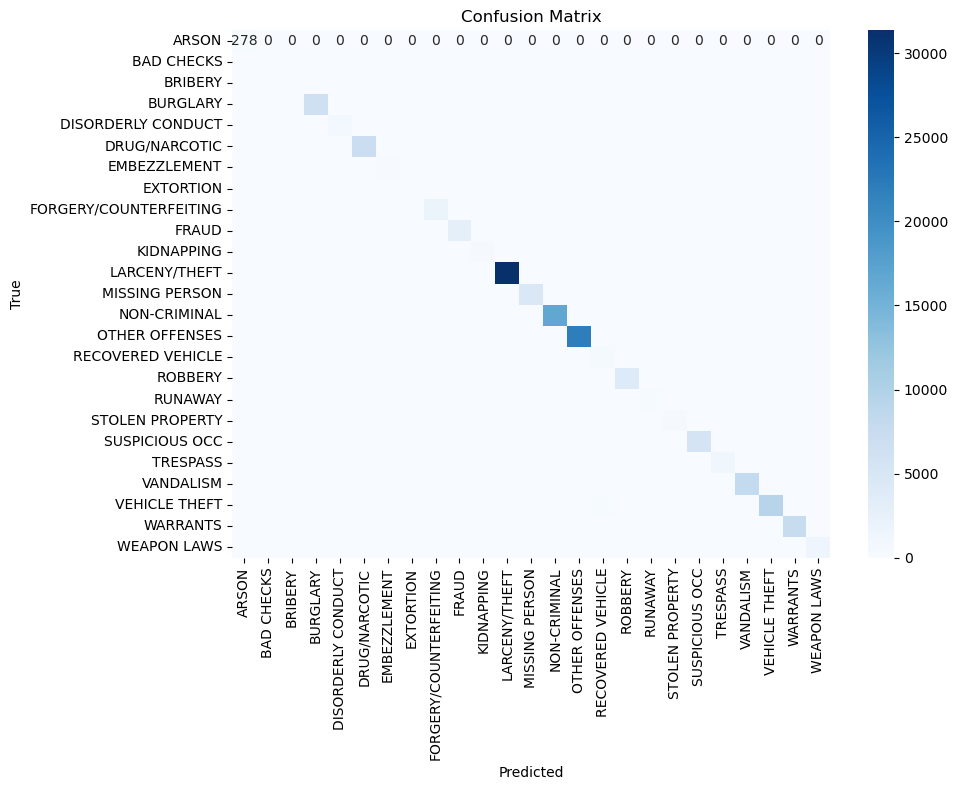


Prediction Results:
Category: LARCENY/THEFT, Confidence: 0.23
Category: OTHER OFFENSES, Confidence: 0.17
Category: NON-CRIMINAL, Confidence: 0.12


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import joblib
import re

# Download necessary NLTK resources
#run only once
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('punkt')

# Text preprocessing function
def preprocess_text(text):
    if not isinstance(text, str):
        return ""
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Tokenize
    tokens = word_tokenize(text)
    
    # Remove stopwords and lemmatize
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    
    cleaned_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    
    return " ".join(cleaned_tokens)

# Prepare the data
X = crimes_data['Descript'].apply(preprocess_text)
y = crimes_data['Category']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create a pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', ngram_range=(1, 2), max_features=5000)),
    ('classifier', MultinomialNB())
])

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'tfidf__max_features': [3000, 5000],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'classifier__alpha': [0.1, 0.5, 1.0]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_

# Evaluate the model
y_pred = best_model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Plot confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# Save the model
joblib.dump(best_model, 'crime_category_prediction_model.pkl')

# Function to predict new crimes with confidence scores
def predict_crime_with_confidence(description):
    # Preprocess the input text
    processed_text = preprocess_text(description)
    
    # Transform the input text
    # Get prediction probabilities
    prediction_probs = best_model.predict_proba([processed_text])[0]
    
    # Get the top 3 predictions
    top_indices = prediction_probs.argsort()[-3:][::-1]
    top_categories = [best_model.classes_[i] for i in top_indices]
    top_probs = [prediction_probs[i] for i in top_indices]
    
    results = []
    for category, prob in zip(top_categories, top_probs):
        results.append((category, prob))
    
    return results

# Example usage
sample_description = "stole a car"
predicted_crimes = predict_crime_with_confidence(sample_description)

print("\nPrediction Results:")
for category, confidence in predicted_crimes:
    print(f"Category: {category}, Confidence: {confidence:.2f}")


# Crime Category prediction Model Training and Evaluation

## Observations

1. **Model Performance**:
   - The model achieved an exceptionally high accuracy of 99.63% with similarly high precision, recall, and F1-scores across most categories.
   - The classification report indicates that the model performs well on the training data, but this may suggest overfitting.

2. **Potential Overfitting**:
   - The near-perfect scores across all metrics suggest that the model might be overfitting to the training data, capturing noise and outliers rather than general patterns.

3. **Feature Importance**:
   - Feedback from my teacher highlighted that the `description` feature might be irrelevant, while features like `PDdistrict`, `longitude`,`latitude`, and `address`,etc. are more significant for prediction.

4. **Model Exploration**:
   - I experimented with other models, such as logistic regression and various supervised algorithms, but they yielded similar accuracy levels.

## Potential Improvements

2. **Model Evaluation**:
   - Implement cross-validation to better assess the model's generalization capabilities.
   - Use a separate validation set to evaluate the model independently of the training data.

3. **Regularization and Tuning**:
   - Apply regularization techniques to prevent overfitting.
   - Perform hyperparameter tuning to optimize model settings.

4. **Alternative Models**:
   - Explore ensemble methods like Random Forests or Gradient Boosting, which can better handle feature interactions and importance.

6. **Feature Importance Analysis**:
   - Conduct a feature importance analysis to identify which features contribute most to the model's predictions.

#### divide categories into severity

In [11]:
# Create a mapping of crime categories to severity levels
severity_mapping = {
    "NON-CRIMINAL": 1, "SUSPICIOUS OCCURRENCE": 1, "MISSING PERSON": 1, "RUNAWAY": 1, "RECOVERED VEHICLE": 1,
    "WARRANTS": 2, "OTHER OFFENSES": 2, "VANDALISM": 2, "TRESPASS": 2, "DISORDERLY CONDUCT": 2, "BAD CHECKS": 2,
    "LARCENY/THEFT": 3, "VEHICLE THEFT": 3, "FORGERY/COUNTERFEITING": 3, "DRUG/NARCOTIC": 3, "STOLEN PROPERTY": 3,
    "FRAUD": 3, "BRIBERY": 3, "EMBEZZLEMENT": 3,
    "ROBBERY": 4, "WEAPON LAWS": 4, "BURGLARY": 4, "EXTORTION": 4,
    "KIDNAPPING": 5, "ARSON": 5
}

# Function to assign severity based on predicted category
def assign_severity(category):
    return severity_mapping.get(category, 0)  # Default to 0 if not found

# Apply severity mapping
crimes_data['Severity'] = crimes_data['Category'].map(assign_severity)

